### IMPORTING LIBRARIES

In [2]:
import numpy as np
import pandas as pd
import os

### CONCATENATING ALL THE FILES FROM DIFFERENT MONTHS

#### Concatenation of files from different months is done to get a csv file for the entire year.

In [3]:
files = [file for file in os.listdir('C://Users//user//Practice EDA//Pandas-Data-Science-Tasks-master//SalesAnalysis//Sales_Data')]
all_data = pd.DataFrame()
for i in files:
    df = pd.read_csv('C://Users//user//Practice EDA//Pandas-Data-Science-Tasks-master//SalesAnalysis//Sales_Data//'+i)
    all_data = pd.concat([all_data,df])

In [4]:
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


In [5]:
all_data.shape

(186850, 6)

### CHECKING FOR NULL VALUES

In [6]:
all_data[all_data.isnull()]

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...
11681,NaN,NaN,NaN,NaN,NaN,NaN
11682,NaN,NaN,NaN,NaN,NaN,NaN
11683,NaN,NaN,NaN,NaN,NaN,NaN
11684,NaN,NaN,NaN,NaN,NaN,NaN


# DATA CLEANING!

### DROPPING NAN VALUES

In [7]:
all_data.dropna(inplace=True)

In [8]:
all_data.isnull().sum()

Order ID            0
Product             0
Quantity Ordered    0
Price Each          0
Order Date          0
Purchase Address    0
dtype: int64

### ADDING MONTH COLUMN

#### From order date column, we will create a month column so that the analysis can be done month wise.

In [9]:
all_data['month_name'] = all_data['Order Date'].str[:2]

In [10]:
all_data['month_name'].unique()

array(['04', '05', 'Or', '08', '09', '12', '01', '02', '03', '07', '06',
       '11', '10'], dtype=object)

#### Month column has to be cleaned as it contains a string value.

In [11]:
final_df = all_data[all_data['Order Date'].str[:2]!='Or']

In [12]:
final_df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month_name
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",04
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",04
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",04


### MAPPING TO MONTH NAMES

#### The month numbers are mapped to month names.

In [13]:
month_dict = {'01':'January','02':'Febraury','03':'March','04':'April','05':'May','06':'June','07':'July','08':'August','09':'Sept','10':'Oct','11':'Nov','12':'Dec'}

In [14]:
final_df['month_name'] = final_df['month_name'].map(month_dict)

C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [15]:
final_df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month_name
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",April
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",April
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",April
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",April
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",April


In [16]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 185950 entries, 0 to 11685
Data columns (total 7 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Order ID          185950 non-null  object
 1   Product           185950 non-null  object
 2   Quantity Ordered  185950 non-null  object
 3   Price Each        185950 non-null  object
 4   Order Date        185950 non-null  object
 5   Purchase Address  185950 non-null  object
 6   month_name        185950 non-null  object
dtypes: object(7)
memory usage: 11.3+ MB


### CHANGING DATATYPES

#### Numerical columns like Price and Quantity is in object datatype. We will cast them to float.

In [17]:
final_df['Price Each'] = final_df['Price Each'].astype('float')

C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [18]:
final_df['Quantity Ordered'] = final_df['Quantity Ordered'].astype('int')

C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [19]:
final_df['Order Date'] = pd.to_datetime(final_df['Order Date'])

C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


### ADDING SALES COLUMN

#### A new column can be added by multiplying Price and Quantity column.

In [20]:
final_df['Sales'] = final_df['Quantity Ordered'] * final_df['Price Each']
final_df['Sales']

C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


0         23.90
2         99.99
3        600.00
4         11.99
5         11.99
          ...  
11681      8.97
11682    700.00
11683    700.00
11684    379.99
11685     11.95
Name: Sales, Length: 185950, dtype: float64

# DATA EXPLORATION!

## Question 1: What was the best month for sales? How much was earned that month?

In [21]:
final_df.groupby('month_name')['Sales'].sum().sort_values(ascending=False)

month_name
Dec         4.613443e+06
Oct         3.736727e+06
April       3.390670e+06
Nov         3.199603e+06
May         3.152607e+06
March       2.807100e+06
July        2.647776e+06
June        2.577802e+06
August      2.244468e+06
Febraury    2.202022e+06
Sept        2.097560e+06
January     1.822257e+06
Name: Sales, dtype: float64

In [22]:
final_df[final_df['month_name']=='Dec']['Sales'].sum()

4613443.34

In C:\Users\user\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\classic.mplstyle: 
The text.latex.preview rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\user\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\classic.mplstyle: 
The mathtext.fallback_to_cm rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\user\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\classic.mplstyle: Support for setting the 'mathtext.fallback_to_cm' rcParam is deprecated since 3.3 and will be removed two minor releases later; use 'mathtext.fallback : 'cm' instead.
In C:\Users\user\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\classic.mplstyle: 
The validate_bool_maybe_none function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\user\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\classic.mplstyle: 
The savefig.jpeg_quality rc

<AxesSubplot:xlabel='month_name'>

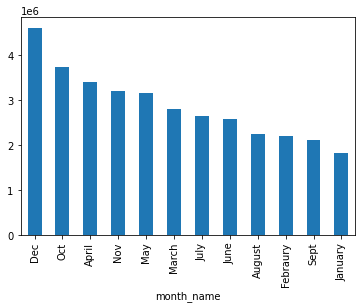

In [23]:
final_df.groupby('month_name')['Sales'].sum().sort_values(ascending=False).plot.bar()

###### The month of DECEMBER recorded the highest sales.

## Question 2: What city sold the most product?

### ADDING CITY AND STATE COLUMN

#### We will add a CITY AND STATE COLUMNS FROM ADDRESS COLUMN

In [24]:
final_df['City'] = final_df['Purchase Address'].apply(lambda x: x.split(',')[1].strip())

C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [25]:
final_df['State'] = final_df['Purchase Address'].apply(lambda x:x.split(',')[2].strip()[:2])

C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [26]:
final_df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month_name,Sales,City,State
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",April,23.90,Dallas,TX
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",April,99.99,Boston,MA
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",April,600.00,Los Angeles,CA
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",April,11.99,Los Angeles,CA
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",April,11.99,Los Angeles,CA


In [27]:
final_df.groupby('City')['Sales'].sum().sort_values(ascending=False)

City
San Francisco    8.262204e+06
Los Angeles      5.452571e+06
New York City    4.664317e+06
Boston           3.661642e+06
Atlanta          2.795499e+06
Dallas           2.767975e+06
Seattle          2.747755e+06
Portland         2.320491e+06
Austin           1.819582e+06
Name: Sales, dtype: float64

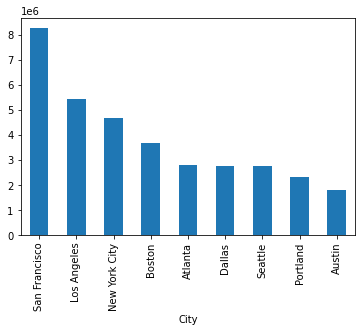

In [28]:
final_df.groupby('City')['Sales'].sum().sort_values(ascending=False).plot.bar();

###### SAN FRANCISCO recorded the highest sales.

## Question 3: What products are most often sold together?

In [29]:
df1 = final_df[final_df['Order ID'].duplicated(keep=False)]
df1.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month_name,Sales,City,State
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",April,600.00,Los Angeles,CA
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",April,11.99,Los Angeles,CA
18,176574,Google Phone,1,600.00,2019-04-03 19:42:00,"20 Hill St, Los Angeles, CA 90001",April,600.00,Los Angeles,CA
19,176574,USB-C Charging Cable,1,11.95,2019-04-03 19:42:00,"20 Hill St, Los Angeles, CA 90001",April,11.95,Los Angeles,CA
30,176585,Bose SoundSport Headphones,1,99.99,2019-04-07 11:31:00,"823 Highland St, Boston, MA 02215",April,99.99,Boston,MA


In [30]:
final_df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month_name,Sales,City,State
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",April,23.90,Dallas,TX
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",April,99.99,Boston,MA
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",April,600.00,Los Angeles,CA
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",April,11.99,Los Angeles,CA
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",April,11.99,Los Angeles,CA


In [31]:
df1['grouped'] = df1.groupby('Order ID')['Product'].transform(lambda x:','.join(x))
df1.head()

C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month_name,Sales,City,State,grouped
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",April,600.00,Los Angeles,CA,"Google Phone,Wired Headphones"
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",April,11.99,Los Angeles,CA,"Google Phone,Wired Headphones"
18,176574,Google Phone,1,600.00,2019-04-03 19:42:00,"20 Hill St, Los Angeles, CA 90001",April,600.00,Los Angeles,CA,"Google Phone,USB-C Charging Cable"
19,176574,USB-C Charging Cable,1,11.95,2019-04-03 19:42:00,"20 Hill St, Los Angeles, CA 90001",April,11.95,Los Angeles,CA,"Google Phone,USB-C Charging Cable"
30,176585,Bose SoundSport Headphones,1,99.99,2019-04-07 11:31:00,"823 Highland St, Boston, MA 02215",April,99.99,Boston,MA,"Bose SoundSport Headphones,Bose SoundSport Hea..."


In [32]:
df1.drop_duplicates().shape

(14385, 11)

In [33]:
df2 = df1[['Order ID','grouped']].drop_duplicates()
df2.shape

(7136, 2)

In [34]:
df2.head()

,Order ID,grouped
3,176560,"Google Phone,Wired Headphones"
18,176574,"Google Phone,USB-C Charging Cable"
30,176585,"Bose SoundSport Headphones,Bose SoundSport Hea..."
32,176586,"AAA Batteries (4-pack),Google Phone"
119,176672,"Lightning Charging Cable,USB-C Charging Cable"


In [35]:
from itertools import combinations
from collections import Counter

In [36]:
count = Counter()

for row in df2['grouped']:
    row_list = row.split(',')
    count.update(Counter(combinations(row_list, 2)))

for key,value in count.most_common(10):
    print(key, value)

('iPhone', 'Lightning Charging Cable') 1005
('Google Phone', 'USB-C Charging Cable') 987
('iPhone', 'Wired Headphones') 447
('Google Phone', 'Wired Headphones') 414
('Vareebadd Phone', 'USB-C Charging Cable') 361
('iPhone', 'Apple Airpods Headphones') 360
('Google Phone', 'Bose SoundSport Headphones') 220
('USB-C Charging Cable', 'Wired Headphones') 160
('Vareebadd Phone', 'Wired Headphones') 143
('Lightning Charging Cable', 'Wired Headphones') 92


## Question 4:What product sold the most? Why do you think it sold the most?

In [37]:
final_df.groupby('Product')['Quantity Ordered'].sum().sort_values(ascending=False)

Product
AAA Batteries (4-pack)        31017
AA Batteries (4-pack)         27635
USB-C Charging Cable          23975
Lightning Charging Cable      23217
Wired Headphones              20557
Apple Airpods Headphones      15661
Bose SoundSport Headphones    13457
27in FHD Monitor               7550
iPhone                         6849
27in 4K Gaming Monitor         6244
34in Ultrawide Monitor         6199
Google Phone                   5532
Flatscreen TV                  4819
Macbook Pro Laptop             4728
ThinkPad Laptop                4130
20in Monitor                   4129
Vareebadd Phone                2068
LG Washing Machine              666
LG Dryer                        646
Name: Quantity Ordered, dtype: int32

<AxesSubplot:xlabel='Product'>

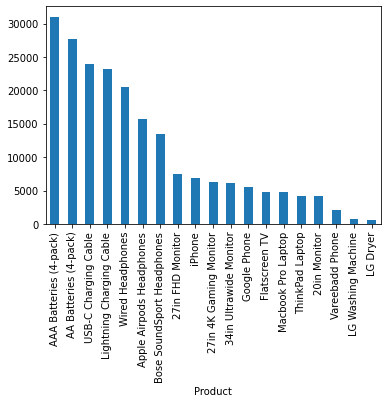

In [38]:
final_df.groupby('Product')['Quantity Ordered'].sum().sort_values(ascending=False).plot.bar()

###### AAA BATTERIES was the most sold product.